In [24]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

In [25]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [26]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

10 20
wvfrm = 
l =  0  SNR =  15.004413066499248  m1 =  10  m2 =  20
24 20
wvfrm = 
l =  1  SNR =  19.181603669253597  m1 =  24  m2 =  20
15 11
wvfrm = 
l =  2  SNR =  9.137072942202085  m1 =  15  m2 =  11
27 29
wvfrm = 
l =  3  SNR =  38.669590402331856  m1 =  27  m2 =  29
23 28
wvfrm = 
l =  4  SNR =  33.16992979451706  m1 =  23  m2 =  28
19 21
wvfrm = 
l =  5  SNR =  7.770153453494613  m1 =  19  m2 =  21
29 27
wvfrm = 
l =  6  SNR =  21.45011421145285  m1 =  29  m2 =  27
11 15
wvfrm = 
l =  7  SNR =  9.825327506831051  m1 =  11  m2 =  15
13 12
wvfrm = 
l =  8  SNR =  13.333788418307849  m1 =  13  m2 =  12
28 10
wvfrm = 
l =  9  SNR =  17.287368568260067  m1 =  28  m2 =  10
20 12
wvfrm = 
l =  10  SNR =  13.132493684715962  m1 =  20  m2 =  12
27 17
wvfrm = 
l =  11  SNR =  18.915051996176377  m1 =  27  m2 =  17
21 10
wvfrm = 
l =  12  SNR =  6.944355056684978  m1 =  21  m2 =  10
28 13
wvfrm = 
l =  13  SNR =  12.564089855236599  m1 =  28  m2 =  13
24 13
wvfrm = 
l =  14  SNR =  23.33

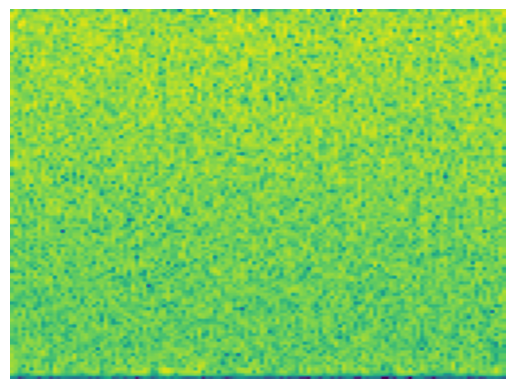

In [27]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:
    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)

    plt.savefig(
        f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
        bbox_inches="tight",
        pad_inches=0,
    )
    l += 1

In [28]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 30
wvfrm = 
l =  100  SNR =  7.417775575373803  m1 =  10  m2 =  30
12 11
wvfrm = 
l =  101  SNR =  12.323645650785757  m1 =  12  m2 =  11
27 22
wvfrm = 
l =  102  SNR =  18.39419630181935  m1 =  27  m2 =  22
25 29
wvfrm = 
l =  103  SNR =  10.689427386256359  m1 =  25  m2 =  29
24 21
wvfrm = 
l =  104  SNR =  11.04603317626211  m1 =  24  m2 =  21
27 22
wvfrm = 
l =  105  SNR =  17.196158968984978  m1 =  27  m2 =  22
30 27
wvfrm = 
l =  106  SNR =  13.064871864604799  m1 =  30  m2 =  27
23 20
wvfrm = 
l =  107  SNR =  44.35954860149638  m1 =  23  m2 =  20
24 16
wvfrm = 
l =  107  SNR =  11.897903610344272  m1 =  24  m2 =  16
10 23
wvfrm = 
l =  108  SNR =  29.584167986015995  m1 =  10  m2 =  23
12 10
wvfrm = 
l =  108  SNR =  5.623652159873328  m1 =  12  m2 =  10
17 24
wvfrm = 
l =  109  SNR =  9.251956272298534  m1 =  17  m2 =  24
28 19
wvfrm = 
l =  110  SNR =  20.343286136001765  m1 =  28  m2 =  19
20 19
wvfrm = 
l =  110  SNR =  13.737243782019538  m1 =  20  m2 =  19
27 11
wvfrm 

30 17
wvfrm = 
l =  200  SNR =  15.129986513323763  m1 =  30  m2 =  17
14 10
wvfrm = 
l =  201  SNR =  6.560053578645956  m1 =  14  m2 =  10
24 21
wvfrm = 
l =  202  SNR =  13.630937944729629  m1 =  24  m2 =  21
27 27
wvfrm = 
l =  203  SNR =  17.146146646692717  m1 =  27  m2 =  27
10 11
wvfrm = 
l =  204  SNR =  7.591111756066261  m1 =  10  m2 =  11
19 16
wvfrm = 
l =  205  SNR =  10.691225044354516  m1 =  19  m2 =  16
13 15
wvfrm = 
l =  206  SNR =  8.78800416715294  m1 =  13  m2 =  15
23 22
wvfrm = 
l =  207  SNR =  13.351120270308977  m1 =  23  m2 =  22
12 28
wvfrm = 
l =  208  SNR =  6.638148953820734  m1 =  12  m2 =  28
19 30
wvfrm = 
l =  209  SNR =  12.66223297293779  m1 =  19  m2 =  30
27 23
wvfrm = 
l =  210  SNR =  16.775428663386048  m1 =  27  m2 =  23
23 23
wvfrm = 
l =  211  SNR =  14.924736973432468  m1 =  23  m2 =  23
20 29
wvfrm = 
l =  212  SNR =  11.07596422565075  m1 =  20  m2 =  29
23 14
wvfrm = 
l =  213  SNR =  12.643631872192922  m1 =  23  m2 =  14
12 10
wvfrm =

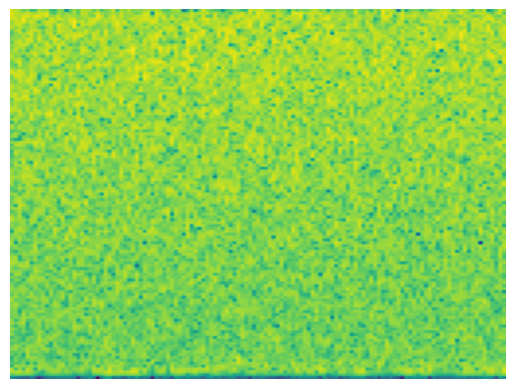

In [ ]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 11
wvfrm = 
l =  300  SNR =  8.798472896571429  m1 =  25  m2 =  11
14 22
wvfrm = 
l =  301  SNR =  8.29890552301223  m1 =  14  m2 =  22
17 19
wvfrm = 
l =  302  SNR =  8.780815078524933  m1 =  17  m2 =  19
28 11
wvfrm = 
l =  303  SNR =  6.679404882698939  m1 =  28  m2 =  11
27 21
wvfrm = 
l =  304  SNR =  11.243321886496835  m1 =  27  m2 =  21
27 18
wvfrm = 
l =  305  SNR =  13.177244506604133  m1 =  27  m2 =  18
22 15
wvfrm = 
l =  306  SNR =  10.768678693471177  m1 =  22  m2 =  15
23 20
wvfrm = 
l =  307  SNR =  11.25155982702129  m1 =  23  m2 =  20
21 30
wvfrm = 
l =  308  SNR =  13.47088176200097  m1 =  21  m2 =  30
12 10
wvfrm = 
l =  309  SNR =  8.787486778109955  m1 =  12  m2 =  10
29 29
wvfrm = 
l =  310  SNR =  19.815101201648037  m1 =  29  m2 =  29
14 14
wvfrm = 
l =  311  SNR =  6.447209773251899  m1 =  14  m2 =  14
15 20
wvfrm = 
l =  312  SNR =  8.989465718489937  m1 =  15  m2 =  20
15 15
wvfrm = 
l =  313  SNR =  7.429156756180235  m1 =  15  m2 =  15
15 15
wvfrm = 
l 

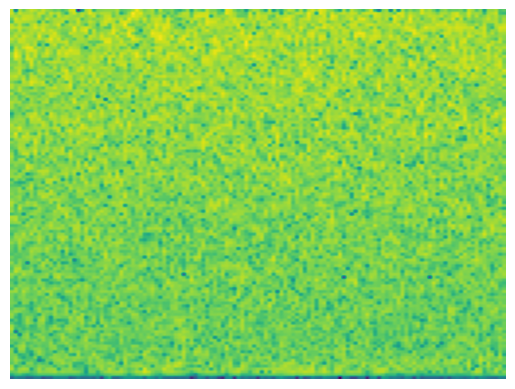

In [ ]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

13 17
wvfrm = 
l =  400  SNR =  10.448956079647159  m1 =  13  m2 =  17
14 18
wvfrm = 
l =  401  SNR =  8.014033053322034  m1 =  14  m2 =  18
13 15
wvfrm = 
l =  402  SNR =  10.556777403900101  m1 =  13  m2 =  15
15 21
wvfrm = 
l =  403  SNR =  9.331026238864645  m1 =  15  m2 =  21
10 30
wvfrm = 
l =  404  SNR =  9.805538888642321  m1 =  10  m2 =  30
26 10
wvfrm = 
l =  405  SNR =  8.94563073579425  m1 =  26  m2 =  10
16 22
wvfrm = 
l =  406  SNR =  9.769960625956235  m1 =  16  m2 =  22
11 21
wvfrm = 
l =  407  SNR =  9.008441250570485  m1 =  11  m2 =  21
12 26
wvfrm = 
l =  408  SNR =  8.880091575760531  m1 =  12  m2 =  26
25 30
wvfrm = 
l =  409  SNR =  15.0117627782398  m1 =  25  m2 =  30
14 26
wvfrm = 
l =  410  SNR =  9.491228218426507  m1 =  14  m2 =  26
18 10
wvfrm = 
l =  411  SNR =  10.042806466769136  m1 =  18  m2 =  10
30 17
wvfrm = 
l =  412  SNR =  9.923974038770274  m1 =  30  m2 =  17
10 28
wvfrm = 
l =  413  SNR =  8.379733110484187  m1 =  10  m2 =  28
28 17
wvfrm = 
l = 

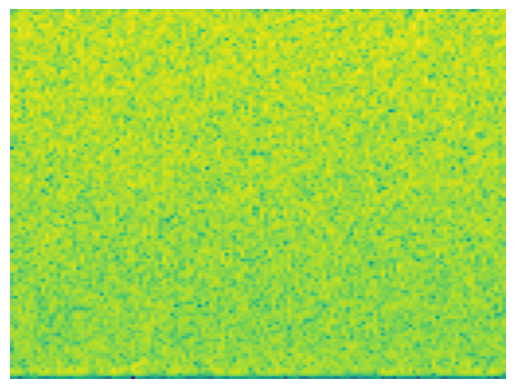

In [ ]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [ ]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

22 28
wvfrm = 
l =  500  SNR =  10.716411580845431  m1 =  22  m2 =  28
15 29
wvfrm = 
l =  501  SNR =  12.788576604347586  m1 =  15  m2 =  29
15 10
wvfrm = 
l =  502  SNR =  8.517205776285074  m1 =  15  m2 =  10
16 12
wvfrm = 
l =  503  SNR =  8.68431292231576  m1 =  16  m2 =  12
25 26
wvfrm = 
l =  504  SNR =  17.280990384058658  m1 =  25  m2 =  26
29 17
wvfrm = 
l =  505  SNR =  10.012968902642092  m1 =  29  m2 =  17
21 14
wvfrm = 
l =  506  SNR =  8.043285452685291  m1 =  21  m2 =  14
30 13
wvfrm = 
l =  507  SNR =  10.661156771947894  m1 =  30  m2 =  13
23 30
wvfrm = 
l =  508  SNR =  13.898328144116014  m1 =  23  m2 =  30
13 19
wvfrm = 
l =  509  SNR =  8.63928184908077  m1 =  13  m2 =  19
11 21
wvfrm = 
l =  510  SNR =  10.143536058591566  m1 =  11  m2 =  21
23 16
wvfrm = 
l =  511  SNR =  7.863243431743306  m1 =  23  m2 =  16
18 19
wvfrm = 
l =  512  SNR =  9.558742947757658  m1 =  18  m2 =  19
22 27
wvfrm = 
l =  513  SNR =  11.754442070727656  m1 =  22  m2 =  27
10 14
wvfrm = 

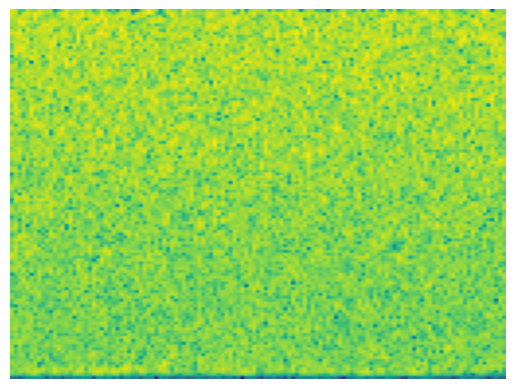

In [ ]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

22 21
wvfrm = 
l =  600  SNR =  12.233940183022272  m1 =  22  m2 =  21
22 16
wvfrm = 
l =  601  SNR =  10.836064026584587  m1 =  22  m2 =  16
26 16
wvfrm = 
l =  602  SNR =  10.177578209440592  m1 =  26  m2 =  16
14 15
wvfrm = 
l =  603  SNR =  9.801589087110745  m1 =  14  m2 =  15
24 12
wvfrm = 
l =  604  SNR =  8.768779444589923  m1 =  24  m2 =  12
14 14
wvfrm = 
l =  605  SNR =  7.623530018926884  m1 =  14  m2 =  14
30 21
wvfrm = 
l =  606  SNR =  12.6991810351877  m1 =  30  m2 =  21
21 12
wvfrm = 
l =  607  SNR =  6.140293547866814  m1 =  21  m2 =  12
20 11
wvfrm = 
l =  608  SNR =  10.026194559319219  m1 =  20  m2 =  11
29 28
wvfrm = 
l =  609  SNR =  16.96600013703728  m1 =  29  m2 =  28
19 13
wvfrm = 
l =  610  SNR =  8.857250672636225  m1 =  19  m2 =  13
21 10
wvfrm = 
l =  611  SNR =  6.744993848706179  m1 =  21  m2 =  10
17 19
wvfrm = 
l =  612  SNR =  12.286490493904113  m1 =  17  m2 =  19
25 27
wvfrm = 
l =  613  SNR =  15.160432036810478  m1 =  25  m2 =  27
16 24
wvfrm = 


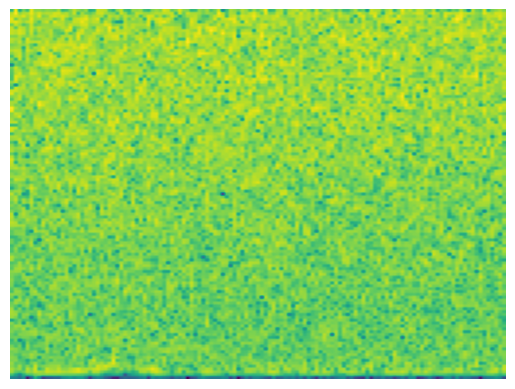

In [ ]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

28 10
wvfrm = 
l =  700  SNR =  10.80888888592826  m1 =  28  m2 =  10
25 11
wvfrm = 
l =  701  SNR =  8.282045666580638  m1 =  25  m2 =  11
20 11
wvfrm = 
l =  702  SNR =  10.135449940198518  m1 =  20  m2 =  11
30 30
wvfrm = 
l =  703  SNR =  13.776421672383087  m1 =  30  m2 =  30
28 13
wvfrm = 
l =  704  SNR =  11.006116779393478  m1 =  28  m2 =  13
25 23
wvfrm = 
l =  705  SNR =  16.06620398425121  m1 =  25  m2 =  23
24 22
wvfrm = 
l =  706  SNR =  10.095600444620077  m1 =  24  m2 =  22
19 30
wvfrm = 
l =  707  SNR =  12.710436666573925  m1 =  19  m2 =  30
15 16
wvfrm = 
l =  708  SNR =  8.579487696868199  m1 =  15  m2 =  16
27 30
wvfrm = 
l =  709  SNR =  18.755745692266192  m1 =  27  m2 =  30
23 11
wvfrm = 
l =  710  SNR =  10.109482124522865  m1 =  23  m2 =  11
21 17
wvfrm = 
l =  711  SNR =  13.146245422357584  m1 =  21  m2 =  17
13 27
wvfrm = 
l =  712  SNR =  10.726870871237336  m1 =  13  m2 =  27
27 25
wvfrm = 
l =  713  SNR =  10.278548750640125  m1 =  27  m2 =  25
11 14
wvfr

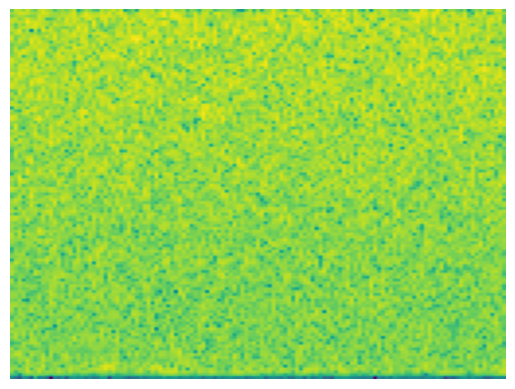

In [ ]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

26 13
wvfrm = 
l =  800  SNR =  14.942164693622942  m1 =  26  m2 =  13
12 30
wvfrm = 
l =  801  SNR =  9.732253254952646  m1 =  12  m2 =  30
23 21
wvfrm = 
l =  802  SNR =  9.767679392606865  m1 =  23  m2 =  21
11 30
wvfrm = 
l =  803  SNR =  10.132655033697514  m1 =  11  m2 =  30
15 16
wvfrm = 
l =  804  SNR =  9.233191759969301  m1 =  15  m2 =  16
28 12
wvfrm = 
l =  805  SNR =  8.088378117869881  m1 =  28  m2 =  12
21 17
wvfrm = 
l =  806  SNR =  7.997330805949582  m1 =  21  m2 =  17
17 10
wvfrm = 
l =  807  SNR =  7.555570516661282  m1 =  17  m2 =  10
11 29
wvfrm = 
l =  808  SNR =  10.891852733406221  m1 =  11  m2 =  29
30 19
wvfrm = 
l =  809  SNR =  9.422133325310867  m1 =  30  m2 =  19
29 28
wvfrm = 
l =  810  SNR =  18.554707081402885  m1 =  29  m2 =  28
25 22
wvfrm = 
l =  811  SNR =  12.1913920871682  m1 =  25  m2 =  22
28 29
wvfrm = 
l =  812  SNR =  12.37245607055644  m1 =  28  m2 =  29
16 19
wvfrm = 
l =  813  SNR =  8.87879088748682  m1 =  16  m2 =  19
28 12
wvfrm = 
l =

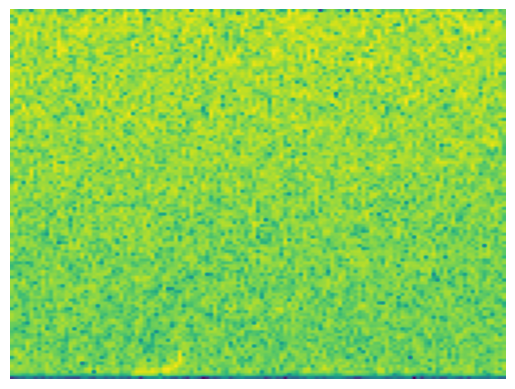

In [ ]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 15
wvfrm = 
l =  900  SNR =  10.706773545527515  m1 =  16  m2 =  15
22 22
wvfrm = 
l =  901  SNR =  12.855841800626933  m1 =  22  m2 =  22
19 14
wvfrm = 
l =  902  SNR =  8.922798849080356  m1 =  19  m2 =  14
26 11
wvfrm = 
l =  903  SNR =  10.586643843324689  m1 =  26  m2 =  11
27 25
wvfrm = 
l =  904  SNR =  12.819595589950001  m1 =  27  m2 =  25
27 21
wvfrm = 
l =  905  SNR =  12.323701656969424  m1 =  27  m2 =  21
20 30
wvfrm = 
l =  906  SNR =  11.934377102548376  m1 =  20  m2 =  30
18 17
wvfrm = 
l =  907  SNR =  9.794675886608823  m1 =  18  m2 =  17
15 22
wvfrm = 
l =  908  SNR =  12.112299778179914  m1 =  15  m2 =  22
25 27
wvfrm = 
l =  909  SNR =  17.561562086361935  m1 =  25  m2 =  27
12 15
wvfrm = 
l =  910  SNR =  7.634103450473626  m1 =  12  m2 =  15
28 13
wvfrm = 
l =  911  SNR =  9.951683079028957  m1 =  28  m2 =  13
28 22
wvfrm = 
l =  912  SNR =  15.465829009171813  m1 =  28  m2 =  22
21 15
wvfrm = 
l =  913  SNR =  12.55475444101484  m1 =  21  m2 =  15
13 27
wvfrm

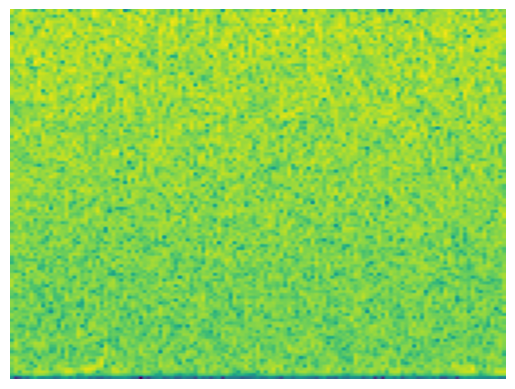

In [ ]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 20
wvfrm = 
l =  1000  SNR =  14.566977516012207  m1 =  25  m2 =  20
17 13
wvfrm = 
l =  1001  SNR =  6.8774727538775835  m1 =  17  m2 =  13
13 20
wvfrm = 
l =  1002  SNR =  10.26899412441358  m1 =  13  m2 =  20
24 13
wvfrm = 
l =  1003  SNR =  12.900704343712672  m1 =  24  m2 =  13
13 14
wvfrm = 
l =  1004  SNR =  8.580566988930022  m1 =  13  m2 =  14
24 11
wvfrm = 
l =  1005  SNR =  11.72784318287606  m1 =  24  m2 =  11
15 26
wvfrm = 
l =  1006  SNR =  12.153632409038233  m1 =  15  m2 =  26
20 19
wvfrm = 
l =  1007  SNR =  13.09285634057311  m1 =  20  m2 =  19
29 25
wvfrm = 
l =  1008  SNR =  12.745276693877736  m1 =  29  m2 =  25
15 12
wvfrm = 
l =  1009  SNR =  7.058015413228523  m1 =  15  m2 =  12
16 11
wvfrm = 
l =  1010  SNR =  8.618311836731642  m1 =  16  m2 =  11
13 22
wvfrm = 
l =  1011  SNR =  8.218444452843961  m1 =  13  m2 =  22
11 10
wvfrm = 
l =  1012  SNR =  9.200128225253035  m1 =  11  m2 =  10
26 28
wvfrm = 
l =  1013  SNR =  16.037867250557998  m1 =  26  m2 =  28


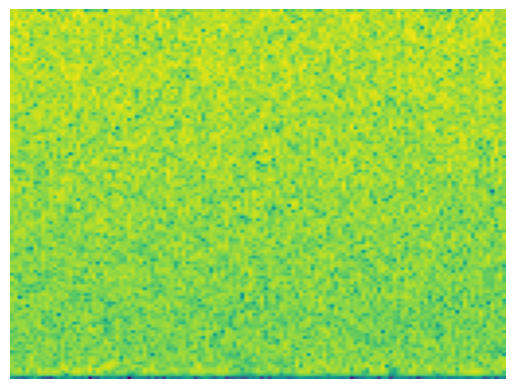

In [ ]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 19
wvfrm = 


l =  1100  SNR =  7.335858219902247  m1 =  10  m2 =  19
30 12
wvfrm = 
l =  1101  SNR =  11.761488490398078  m1 =  30  m2 =  12
16 25
wvfrm = 
l =  1102  SNR =  8.796559760567519  m1 =  16  m2 =  25
23 25
wvfrm = 
l =  1103  SNR =  15.5779610680298  m1 =  23  m2 =  25
29 14
wvfrm = 
l =  1104  SNR =  11.772273199737407  m1 =  29  m2 =  14
13 25
wvfrm = 
l =  1105  SNR =  10.186843629392019  m1 =  13  m2 =  25
16 15
wvfrm = 
l =  1106  SNR =  6.620645019134758  m1 =  16  m2 =  15
13 20
wvfrm = 
l =  1107  SNR =  7.544724303735163  m1 =  13  m2 =  20
27 30
wvfrm = 
l =  1108  SNR =  14.509808704496935  m1 =  27  m2 =  30
26 28
wvfrm = 
l =  1109  SNR =  15.62231795768663  m1 =  26  m2 =  28
29 24
wvfrm = 
l =  1110  SNR =  18.21698973528281  m1 =  29  m2 =  24
13 25
wvfrm = 
l =  1111  SNR =  7.755654333474367  m1 =  13  m2 =  25
26 17
wvfrm = 
l =  1112  SNR =  11.841211010532994  m1 =  26  m2 =  17
16 21
wvfrm = 
l =  1113  SNR =  8.812159730538463  m1 =  16  m2 =  21
24 29
wvfrm = 
l 

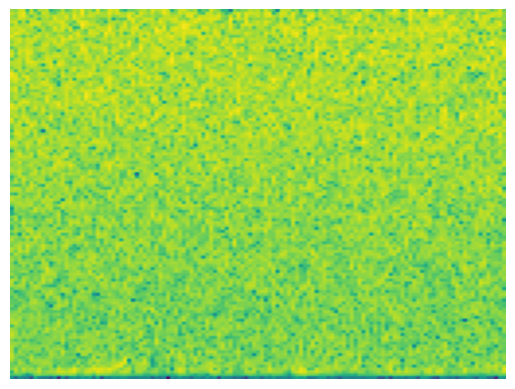

In [ ]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 14
wvfrm = 
l =  1200  SNR =  9.445817120505586  m1 =  18  m2 =  14
28 17
wvfrm = 
l =  1201  SNR =  14.754919659043036  m1 =  28  m2 =  17
28 16
wvfrm = 
l =  1202  SNR =  13.49285766197078  m1 =  28  m2 =  16
30 14
wvfrm = 
l =  1203  SNR =  13.97223467457094  m1 =  30  m2 =  14
21 14
wvfrm = 
l =  1204  SNR =  8.020101135331638  m1 =  21  m2 =  14
10 15
wvfrm = 
l =  1205  SNR =  8.69902725814669  m1 =  10  m2 =  15
20 20
wvfrm = 
l =  1206  SNR =  12.72513069676985  m1 =  20  m2 =  20
26 22
wvfrm = 
l =  1207  SNR =  12.32217834008965  m1 =  26  m2 =  22
13 15
wvfrm = 
l =  1208  SNR =  7.841795942188218  m1 =  13  m2 =  15
28 14
wvfrm = 
l =  1209  SNR =  12.245760716743714  m1 =  28  m2 =  14
20 19
wvfrm = 
l =  1210  SNR =  9.827318874999879  m1 =  20  m2 =  19
29 26
wvfrm = 
l =  1211  SNR =  13.266264450588162  m1 =  29  m2 =  26
18 13
wvfrm = 
l =  1212  SNR =  8.2115177049245  m1 =  18  m2 =  13
23 13
wvfrm = 
l =  1213  SNR =  8.789355085496618  m1 =  23  m2 =  13
27 20


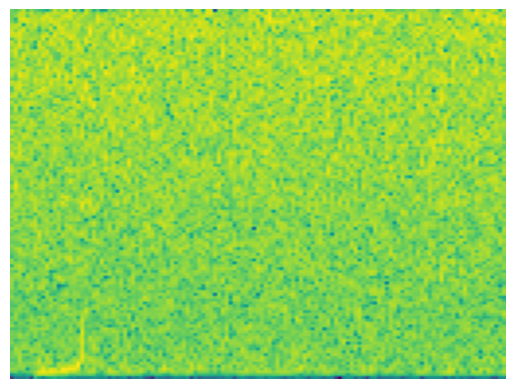

In [ ]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

13 16
wvfrm = 
l =  1300  SNR =  6.752982250517216  m1 =  13  m2 =  16
25 16
wvfrm = 
l =  1301  SNR =  8.360168875288238  m1 =  25  m2 =  16
24 29
wvfrm = 
l =  1302  SNR =  11.555287510820047  m1 =  24  m2 =  29
30 30
wvfrm = 
l =  1303  SNR =  11.863855545643984  m1 =  30  m2 =  30
26 24
wvfrm = 
l =  1304  SNR =  14.284622764448358  m1 =  26  m2 =  24
27 29
wvfrm = 
l =  1305  SNR =  18.05051613457141  m1 =  27  m2 =  29
30 12
wvfrm = 
l =  1306  SNR =  8.501908575245608  m1 =  30  m2 =  12
30 15
wvfrm = 
l =  1307  SNR =  12.602997530154774  m1 =  30  m2 =  15
28 11
wvfrm = 
l =  1308  SNR =  11.343470442876974  m1 =  28  m2 =  11
17 21
wvfrm = 
l =  1309  SNR =  11.643326140417019  m1 =  17  m2 =  21
14 27
wvfrm = 
l =  1310  SNR =  10.869783302427102  m1 =  14  m2 =  27
26 24
wvfrm = 
l =  1311  SNR =  12.160403145521421  m1 =  26  m2 =  24
15 27
wvfrm = 
l =  1312  SNR =  9.982971095266912  m1 =  15  m2 =  27
21 16
wvfrm = 
l =  1313  SNR =  10.4978689141827  m1 =  21  m2 =  16

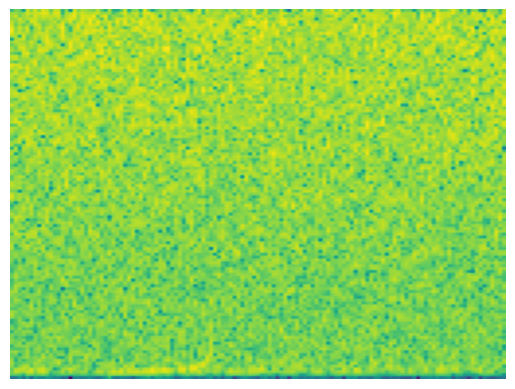

In [ ]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 24
wvfrm = 
l =  1400  SNR =  9.570410966318102  m1 =  20  m2 =  24
19 14
wvfrm = 
l =  1401  SNR =  12.353469060084356  m1 =  19  m2 =  14
19 18
wvfrm = 
l =  1402  SNR =  9.213028982652528  m1 =  19  m2 =  18
26 17
wvfrm = 
l =  1403  SNR =  12.348669045843591  m1 =  26  m2 =  17
10 22
wvfrm = 
l =  1404  SNR =  11.856275735431526  m1 =  10  m2 =  22
11 17
wvfrm = 
l =  1405  SNR =  8.286420834437438  m1 =  11  m2 =  17
23 24
wvfrm = 
l =  1406  SNR =  9.572750127621545  m1 =  23  m2 =  24
29 26
wvfrm = 
l =  1407  SNR =  13.032139748695522  m1 =  29  m2 =  26
26 23
wvfrm = 
l =  1408  SNR =  12.576217501627713  m1 =  26  m2 =  23
26 16
wvfrm = 
l =  1409  SNR =  14.64005047983018  m1 =  26  m2 =  16
24 20
wvfrm = 
l =  1410  SNR =  15.365367819765533  m1 =  24  m2 =  20
20 27
wvfrm = 
l =  1411  SNR =  10.991940280585867  m1 =  20  m2 =  27
22 19
wvfrm = 
l =  1412  SNR =  11.311865167396919  m1 =  22  m2 =  19
27 12
wvfrm = 
l =  1413  SNR =  8.299089645548769  m1 =  27  m2 =  1

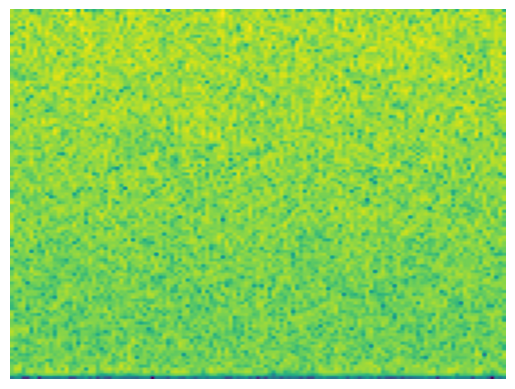

In [ ]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
